In [6]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np

print(cv2.__version__)

4.8.1


## OpenCV 常用 API

In [7]:
def show_img(mat):
    # BGR to RGB
    # mat = mat[:,:,::-1]
    mat = cv2.cvtColor(mat, cv2.COLOR_BGR2RGB)
    plt.imshow(mat)
    plt.show()

In [3]:
def cv_show_img(mat):
    cv2.imshow('cat', mat)
    cv2.waitKey(2000)
    cv2.destroyAllWindows()

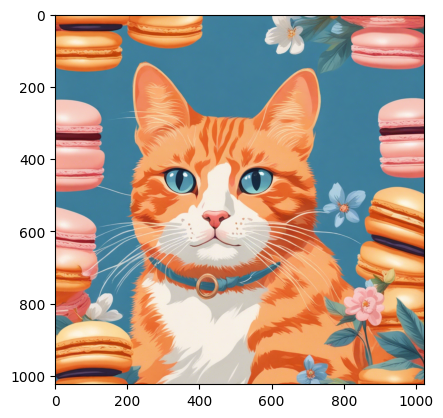

In [4]:
## 读取图像
mat = cv2.imread('./assets/cat_a.png', cv2.IMREAD_COLOR)
show_img(mat)

In [5]:
## 保存图像
cv2.imwrite('./assets/cat_a_copy.png', mat)

True

In [3]:
# 读取摄像头做高斯模糊
cv2.namedWindow('video', cv2.WINDOW_NORMAL)
cv2.resizeWindow('video', 640, 480)

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()

    # frame = cv2.flip(frame, 1)
    frame = cv2.GaussianBlur(frame, (65, 65), 50)

    cv2.imshow('video', frame)

    key = cv2.waitKey(1)

    if key & 0xFF == ord('q'):
        break

cap.release()

2023-12-21 15:06:24.650 python[61842:9837002] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.


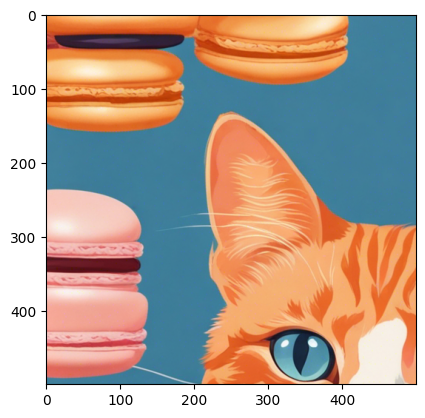

In [6]:
# ROI (region of interest)
roi = mat[0:500, 0:500, :] 
show_img(roi)

In [7]:
# 播放视频并在每一帧上绘制文本
from datetime import datetime

cap = cv2.VideoCapture('./assets/SampleVideo_1280x720_1mb.mp4')

while (True):

    # Capture frames in the video
    ret, frame = cap.read()

    # describe the type of font
    # to be used.
    font = cv2.FONT_HERSHEY_SIMPLEX

    # Use putText() method for
    # inserting text on video
    cv2.putText(
        frame,
        'TEXT ON VIDEO' +  datetime.now().strftime("%H:%M:%S"),
        (50, 50),
        font, 
        1,
        (0, 255, 255),
        2,
        cv2.LINE_4
    )

    # Display the resulting frame
    cv2.imshow('video', frame)

    # creating 'q' as the quit
    # button for the video
    if cv2.waitKey(16) & 0xFF == ord('q'):
        break

# release the cap object
cap.release()
# close all windows
cv2.destroyAllWindows()

error: OpenCV(4.8.1) /Users/xperience/GHA-OpenCV-Python/_work/opencv-python/opencv-python/opencv/modules/highgui/src/window.cpp:971: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'imshow'


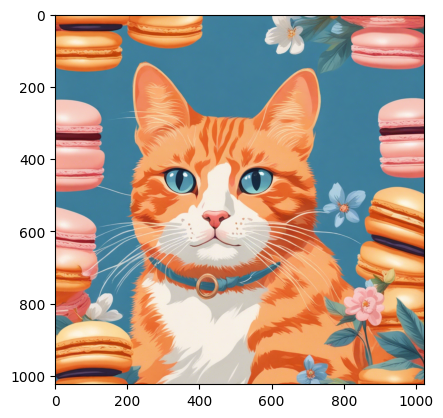

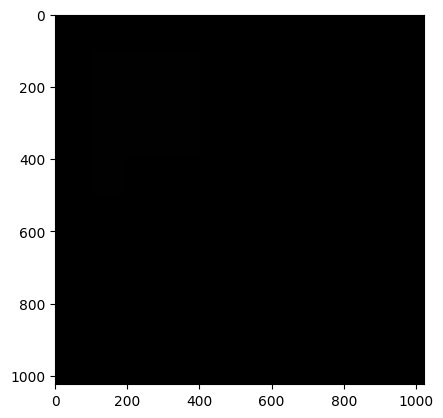

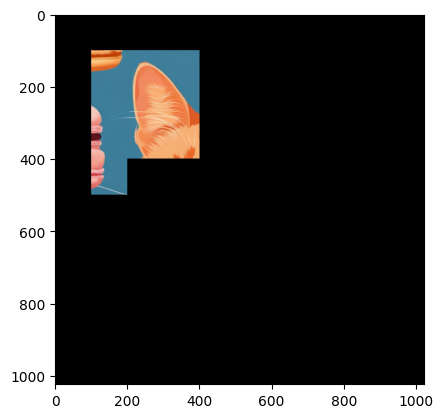

In [9]:
# 掩模 逻辑乘
mat = cv2.imread('./assets/cat_a.png', cv2.IMREAD_COLOR)
h, w, c = mat.shape
show_img(mat)

mask = np.zeros((h, w, c), np.uint8)
mask[100:400, 200:400] = 1
mask[100:500, 100: 200] = 1
mat = mat * mask

show_img(mask)
show_img(mat)

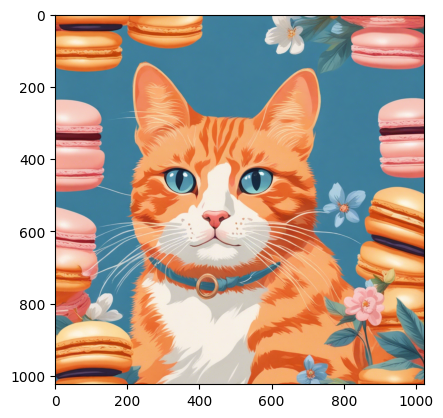

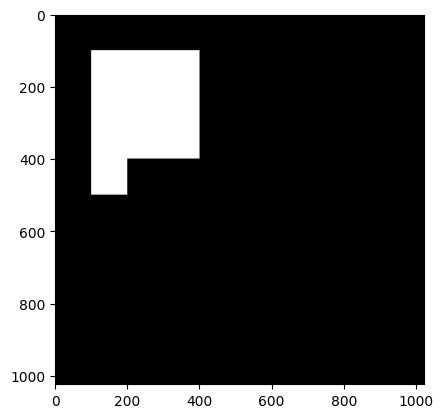

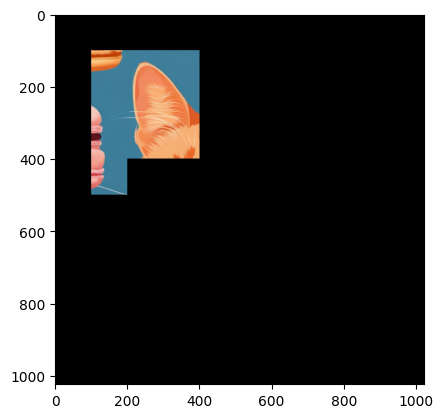

In [8]:
# 掩模 逻辑与运算
mat = cv2.imread('./assets/cat_a.png', cv2.IMREAD_COLOR)
h, w, c = mat.shape
show_img(mat)

mask = np.zeros((h, w, c), np.uint8)
mask[100:400, 200:400] = 255
mask[100:500, 100: 200] = 255

mat = cv2.bitwise_and(mat, mask)

show_img(mask)
show_img(mat)

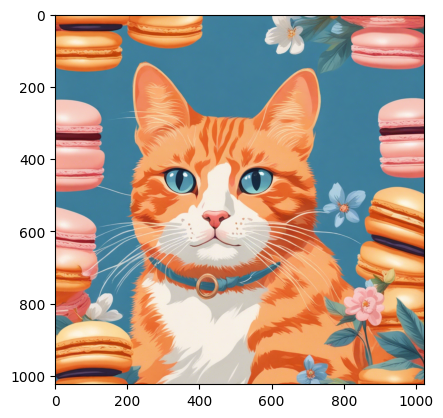

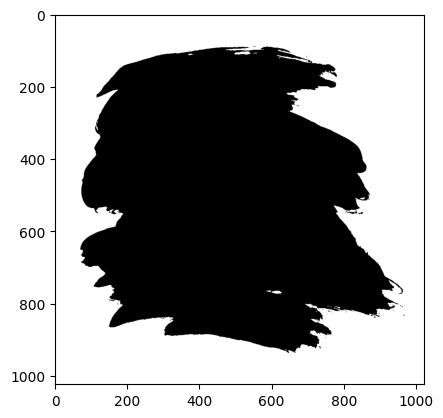

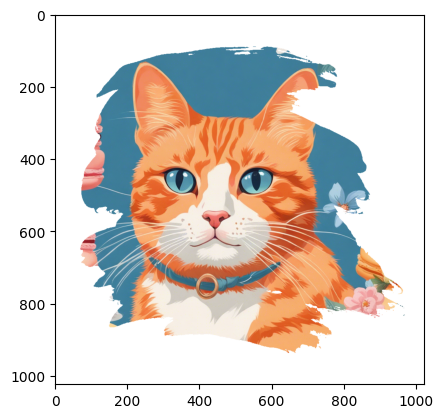

In [20]:
# 掩模 遮罩
mat = cv2.imread('./assets/cat_a.png', cv2.IMREAD_COLOR)
h, w, c = mat.shape
show_img(mat)

mask = cv2.imread('./assets/mask.png', cv2.IMREAD_COLOR) # np.zeros((h, w, c), np.uint8)
mask = cv2.resize(mask, (h, w))

# 除噪
# mask[mask < 127] = 0
# mask[mask >= 127] = 255
ret, mask = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)

show_img(mask)
show_img(cv2.bitwise_or(mat, mask))

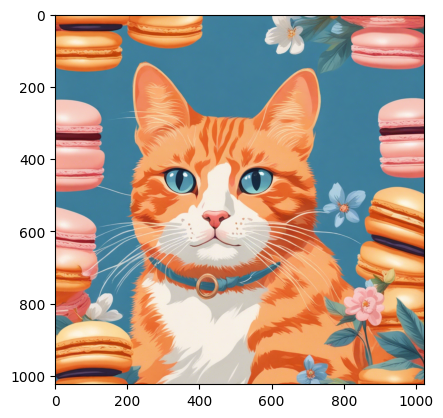

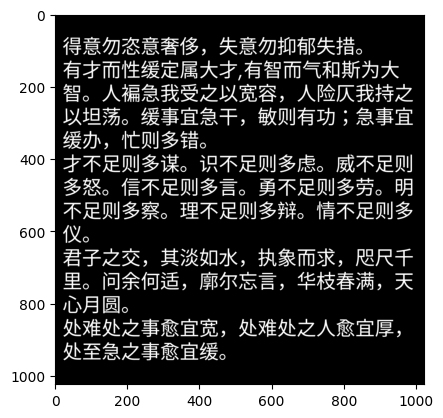

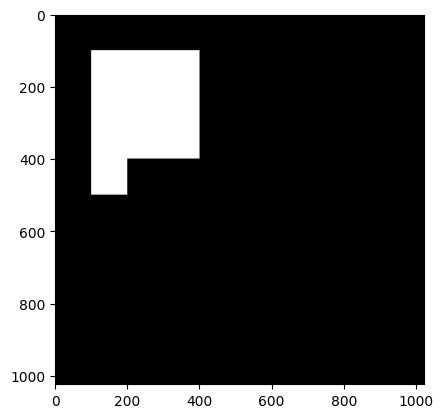

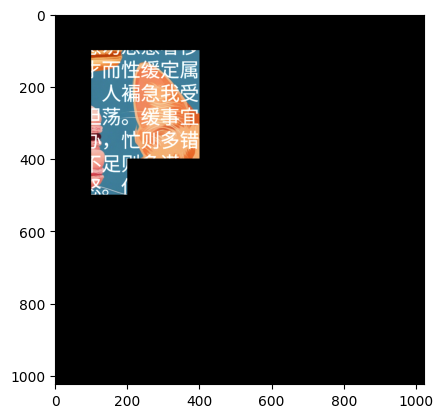

In [16]:
# 掩模 加运算

mat = cv2.imread('./assets/cat_a.png', cv2.IMREAD_COLOR)
h, w, c = mat.shape
show_img(mat)

text = cv2.imread('./assets/text.png', cv2.IMREAD_COLOR)
text = cv2.resize(text, (h, w))
show_img(text)

mask = np.zeros((h, w), np.uint8)
mask[100:400, 200:400] = 255
mask[100:500, 100: 200] = 255
show_img(mask)

show_img(cv2.add(mat, text, mask=mask))

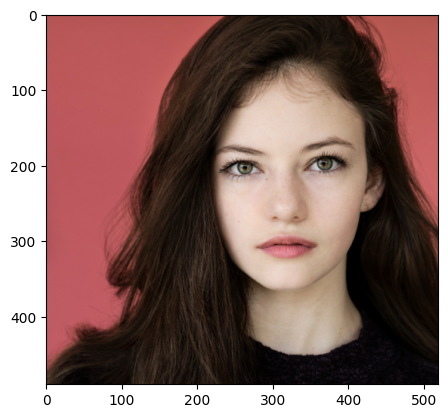

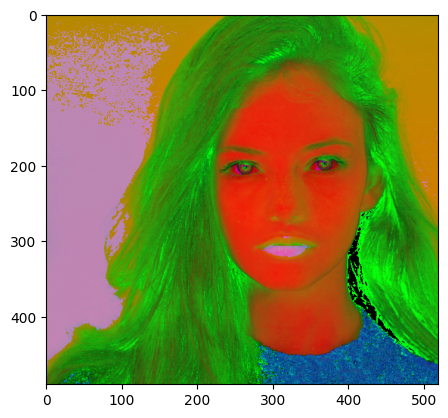

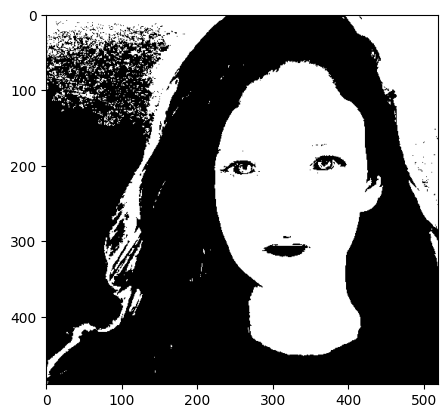

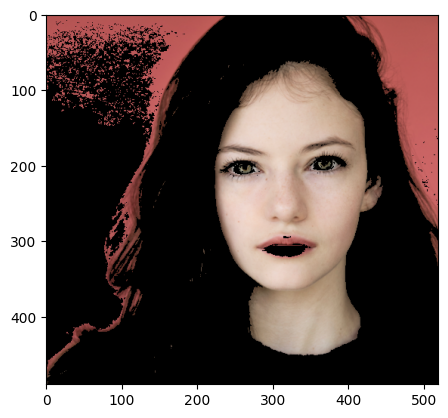

In [21]:
# HSV 获取皮肤范围

mat = cv2.imread('./assets/girl.png', cv2.IMREAD_COLOR)
hsv = cv2.cvtColor(mat, cv2.COLOR_BGR2HSV)
show_img(mat)
show_img(hsv)

# Hue: [0 - 33]
# Saturation: [10 - 255]
# Value: [80 - 255]
min_hsv = np.array([0, 10, 80], np.uint8)
max_hsv = np.array((33, 255, 255), np.uint8)
mask = cv2.inRange(hsv, min_hsv, max_hsv)

show_img(mask)

show_img(cv2.bitwise_and(mat, mat, mask=mask))